In [1]:
!wget https://raw.githubusercontent.com/anshupandey/Machine_Learning_Training/master/datasets/image_data.zip


--2020-11-15 06:50:57--  https://raw.githubusercontent.com/anshupandey/Machine_Learning_Training/master/datasets/image_data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20160500 (19M) [application/zip]
Saving to: ‘image_data.zip’

image_data.zip      100%[===================>]  19.23M  74.7MB/s    in 0.3s    

2020-11-15 06:50:58 (74.7 MB/s) - ‘image_data.zip’ saved [20160500/20160500]



In [2]:
!unzip '/content/image_data.zip'

Archive:  /content/image_data.zip
  inflating: image_data/car3.png     
  inflating: image_data/cat.jpeg     
  inflating: image_data/cat2.jpg     
   creating: image_data/data/
   creating: image_data/data/dogs/
  inflating: image_data/data/dogs/dog.1.jpg  
  inflating: image_data/data/dogs/dog.10.jpg  
  inflating: image_data/data/dogs/dog.100.jpg  
  inflating: image_data/data/dogs/dog.101.jpg  
  inflating: image_data/data/dogs/dog.102.jpg  
  inflating: image_data/data/dogs/dog.103.jpg  
  inflating: image_data/data/dogs/dog.104.jpg  
  inflating: image_data/data/dogs/dog.105.jpg  
  inflating: image_data/data/dogs/dog.106.jpg  
  inflating: image_data/data/dogs/dog.107.jpg  
  inflating: image_data/data/dogs/dog.108.jpg  
  inflating: image_data/data/dogs/dog.109.jpg  
  inflating: image_data/data/dogs/dog.11.jpg  
  inflating: image_data/data/dogs/dog.110.jpg  
  inflating: image_data/data/dogs/dog.111.jpg  
  inflating: image_data/data/dogs/dog.112.jpg  
  inflating: image_data

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models,layers

In [4]:

names = os.listdir("image_data/data")
names

['dogs', 'horses', 'Humans']

# Dataset Description


In [5]:
import cv2
x = []
y = []

for folder in names:
  files = os.listdir("image_data/data/"+folder)
  for file in files:
    img = image.load_img("image_data/data/"+folder+"/"+file,target_size=(200,200))
    img = image.img_to_array(img)
    #red_channel = img[:,:,2]
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # img = (img > 64) * 255
    #im_bin_192 = (img > 192) * 255
    x.append(img)
    y.append(names.index(folder))

x = np.array(x)
y = np.array(y)
print(x.shape)
print(y.shape)

(606, 200, 200, 3)
(606,)


In [6]:
# onehotencoding the labels
y = to_categorical(y)
print(y.shape)

(606, 3)


In [7]:
#scale the data
x = x/255
x.shape

(606, 200, 200, 3)

In [8]:
# im_bin_64 = (x > 64) * 255
# im_bin_192 = (x > 192) * 255

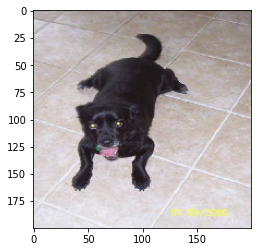

In [9]:
# img = X_train.iloc[3].as_matrix()
# img = img.reshape((28,28))
# plt.imshow(img,cmap='gray')
# plt.title(train.iloc[3,0])
# plt.axis("off")
# plt.show()
img = x[67]
plt.imshow(img, cmap = 'gray')
plt.show()

# CNN from scratch

In [10]:

#split the data into train and test set
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=5)

In [11]:
model = models.Sequential()

model.add(layers.Conv2D(filters=20,kernel_size=(5,5),input_shape=(200,200,3),activation = 'relu'))
model.add(layers.Conv2D(30,(5,5),activation='relu'))

model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(40,(3,3),activation='relu'))
model.add(layers.Conv2D(60,(3,3),activation='relu'))

model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(180,activation='relu'))

model.add(layers.Dropout(0.5))

model.add(layers.Dense(100,activation='relu'))
model.add(layers.Dense(3,activation='softmax'))

In [12]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(xtrain,ytrain,batch_size=32,epochs=20,validation_data=(xtest,ytest))

Epoch 1/20
16/16 [==============================] - 2s 106ms/step - loss: 2.2386 - accuracy: 0.2975 - val_loss: 1.0981 - val_accuracy: 0.3525
Epoch 2/20
16/16 [==============================] - 1s 75ms/step - loss: 1.0963 - accuracy: 0.3264 - val_loss: 1.0967 - val_accuracy: 0.3525
Epoch 3/20
16/16 [==============================] - 1s 76ms/step - loss: 1.1042 - accuracy: 0.3409 - val_loss: 1.0972 - val_accuracy: 0.4098
Epoch 4/20
16/16 [==============================] - 1s 76ms/step - loss: 1.0693 - accuracy: 0.4669 - val_loss: 1.0781 - val_accuracy: 0.4672
Epoch 5/20
16/16 [==============================] - 1s 76ms/step - loss: 0.9441 - accuracy: 0.5785 - val_loss: 1.0368 - val_accuracy: 0.5082
Epoch 6/20
16/16 [==============================] - 1s 76ms/step - loss: 0.8013 - accuracy: 0.6426 - val_loss: 1.1785 - val_accuracy: 0.4836
Epoch 7/20
16/16 [==============================] - 1s 77ms/step - loss: 0.7023 - accuracy: 0.7190 - val_loss: 1.1444 - val_accuracy: 0.4590
Epoch 8/20
1

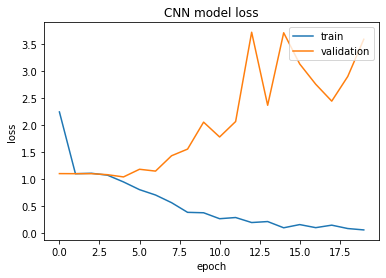

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

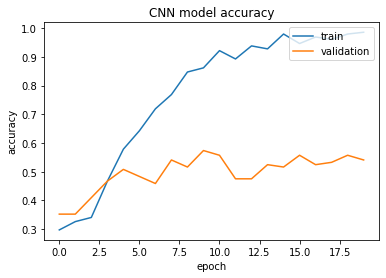

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.savefig('/content/drive/My Drive/Colab Notebooks/optical/CNN accuracy.png')
plt.show()


In [15]:
#plot_model(model,show_layer_names=True)

# Transfer Learning using Resnet50

In [16]:
from tensorflow.keras.applications import resnet50

model2 = resnet50.ResNet50(weights='imagenet')
#model2.summary()

102973440/102967424 [==============================] - 1s 0us/step


In [17]:
# load the model without last layer

input_layer = layers.Input(shape=(200,200,3))

model2 = resnet50.ResNet50(weights='imagenet',include_top=False,input_tensor=input_layer)
#model2.summary()

94773248/94765736 [==============================] - 1s 0us/step


In [18]:

last_layer = model2.output

flat = layers.Flatten()(last_layer)
output_layer = layers.Dense(3,activation='softmax')(flat)

new_model = models.Model(inputs=input_layer,outputs=output_layer)
#new_model.summary()

In [19]:
for layer in new_model.layers[:-1]:
  layer.trainable=False

In [20]:
#new_model.summary()


In [21]:
x = []
y = []

for folder in names:
  files = os.listdir("image_data/data/"+folder)
  for file in files:
    img = image.load_img("image_data/data/"+folder+"/"+file,target_size=(200,200))
    img = image.img_to_array(img)
    img = resnet50.preprocess_input(img)
    x.append(img)
    y.append(names.index(folder))


x = np.array(x)
y = np.array(y)
print(x.shape)
print(y.shape)

(606, 200, 200, 3)
(606,)


In [22]:

# onehotencoding the labels
y = to_categorical(y)
print(y.shape)

(606, 3)


In [23]:
#split the data into train and test set
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=5)

In [24]:

new_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history1 = new_model.fit(xtrain,ytrain,batch_size=32,epochs=20,validation_data=(xtest,ytest))

Epoch 1/20
16/16 [==============================] - 3s 169ms/step - loss: 2.0822 - accuracy: 0.8595 - val_loss: 0.4015 - val_accuracy: 0.9836
Epoch 2/20
16/16 [==============================] - 1s 93ms/step - loss: 0.4889 - accuracy: 0.9855 - val_loss: 3.9085e-09 - val_accuracy: 1.0000
Epoch 3/20
16/16 [==============================] - 1s 94ms/step - loss: 2.4630e-10 - accuracy: 1.0000 - val_loss: 0.1232 - val_accuracy: 0.9754
Epoch 4/20
16/16 [==============================] - 2s 94ms/step - loss: 2.1043e-06 - accuracy: 1.0000 - val_loss: 0.2753 - val_accuracy: 0.9754
Epoch 5/20
16/16 [==============================] - 1s 94ms/step - loss: 5.8919e-04 - accuracy: 1.0000 - val_loss: 0.1789 - val_accuracy: 0.9754
Epoch 6/20
16/16 [==============================] - 1s 93ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0115 - val_accuracy: 1.0000
Epoch 7/20
16/16 [==============================] - 2s 94ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0029 - val_accur

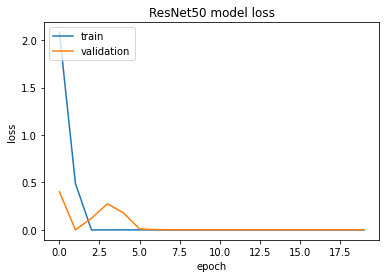

In [25]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('ResNet50 model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

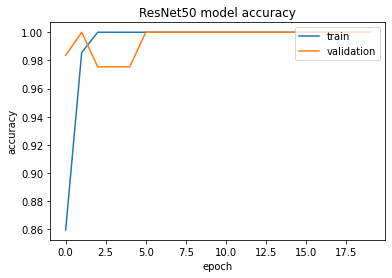

In [26]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('ResNet50 model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.savefig('/content/drive/My Drive/Colab Notebooks/optical/ResNet50_accuracy')
plt.show()

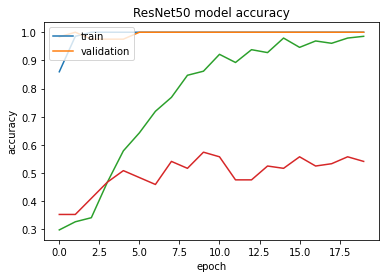

In [27]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('ResNet50 model accuracy')
plt.ylabel('accuracy',)
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('/content/drive/My Drive/Colab Notebooks/optical/CNN and ResNet50.png')
plt.show()

# VGG16

In [28]:
from keras.applications.vgg16 import VGG16

In [29]:
from keras.utils.vis_utils import plot_model

In [30]:
model = VGG16()

553467904/553467096 [==============================] - 3s 0us/step


In [31]:
import tensorflow as tf
model = tf.keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_tensor=input_layer,)

58892288/58889256 [==============================] - 1s 0us/step


In [32]:
last_layer = model.output

flat = layers.Flatten()(last_layer)
output_layer = layers.Dense(3,activation='softmax')(flat)

new_model = models.Model(inputs=input_layer,outputs=output_layer)

In [33]:
for layer in new_model.layers[:-1]:
  layer.trainable=False

In [34]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

In [35]:
x = []
y = []

for folder in names:
  files = os.listdir("image_data/data/"+folder)
  for file in files:
    img = image.load_img("image_data/data/"+folder+"/"+file,target_size=(200,200))
    img = image.img_to_array(img)
    img = resnet50.preprocess_input(img)
    x.append(img)
    y.append(names.index(folder))


x = np.array(x)
y = np.array(y)
print(x.shape)
print(y.shape)

(606, 200, 200, 3)
(606,)


In [36]:

# onehotencoding the labels
y = to_categorical(y)
print(y.shape)


(606, 3)


In [37]:
#split the data into train and test set
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=5)

In [38]:

new_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history2 = new_model.fit(xtrain,ytrain,batch_size=32,epochs=20,validation_data=(xtest,ytest))

Epoch 1/20
16/16 [==============================] - 4s 221ms/step - loss: 2.8961 - accuracy: 0.8781 - val_loss: 0.1341 - val_accuracy: 0.9918
Epoch 2/20
16/16 [==============================] - 2s 122ms/step - loss: 0.2222 - accuracy: 0.9855 - val_loss: 0.7089 - val_accuracy: 0.9754
Epoch 3/20
16/16 [==============================] - 2s 123ms/step - loss: 0.1068 - accuracy: 0.9938 - val_loss: 0.0662 - val_accuracy: 0.9918
Epoch 4/20
16/16 [==============================] - 2s 124ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.2184 - val_accuracy: 0.9836
Epoch 5/20
16/16 [==============================] - 2s 124ms/step - loss: 3.9408e-09 - accuracy: 1.0000 - val_loss: 0.2579 - val_accuracy: 0.9836
Epoch 6/20
16/16 [==============================] - 2s 125ms/step - loss: 7.1427e-09 - accuracy: 1.0000 - val_loss: 0.2674 - val_accuracy: 0.9836
Epoch 7/20
16/16 [==============================] - 2s 125ms/step - loss: 6.4038e-09 - accuracy: 1.0000 - val_loss: 0.2691 - val_accurac

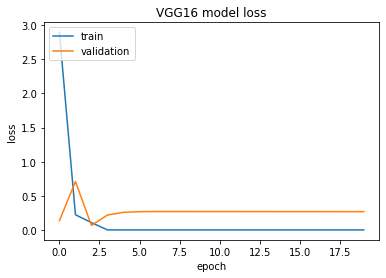

In [39]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('VGG16 model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

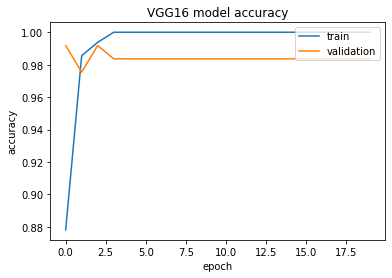

In [40]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('VGG16 model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.savefig('/content/drive/My Drive/Colab Notebooks/optical/VGG16_accuracy.png')
plt.show()

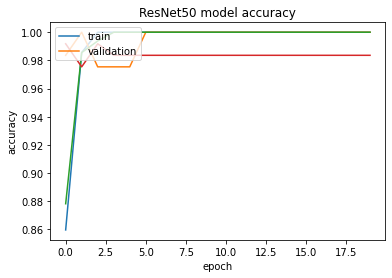

In [41]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('ResNet50 model accuracy')
plt.ylabel('accuracy',)
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('/content/drive/My Drive/Colab Notebooks/optical/CNN and ResNet50.png')
plt.show()

In [45]:
# y = new_model.predict()
# print(y)
pred = compile.predict('/content/image_data/car3.png')
print("Probability that it is a Dog = ", "%.2f" % pred)

AttributeError: ignored